<a href="https://colab.research.google.com/github/asadali27232/FYP/blob/main/017_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb
import os

# Define the directory where the files are located
data_dir = os.path.join(os.path.dirname(os.getcwd()),
                        'data', 'records500', '00000')

# File names without extensions
record_name = '00001_hr'

# Complete file paths
hea_file = os.path.join(data_dir, record_name)
dat_file = os.path.join(data_dir, record_name + '.dat')

# Read ECG data using wfdb
signals, fields = wfdb.rdsamp(hea_file)

# Get the lead names from the signal information
lead_names = fields['sig_name']

# If lead names are not provided, generate default names
if not lead_names:
    lead_names = [f'Lead\\{i+1}' for i in range(len(signals[0]))]

In [2]:
import pandas as pd
df = pd.DataFrame(signals, columns=lead_names)
df.to_excel('00001_hr.xlsx', index=False)

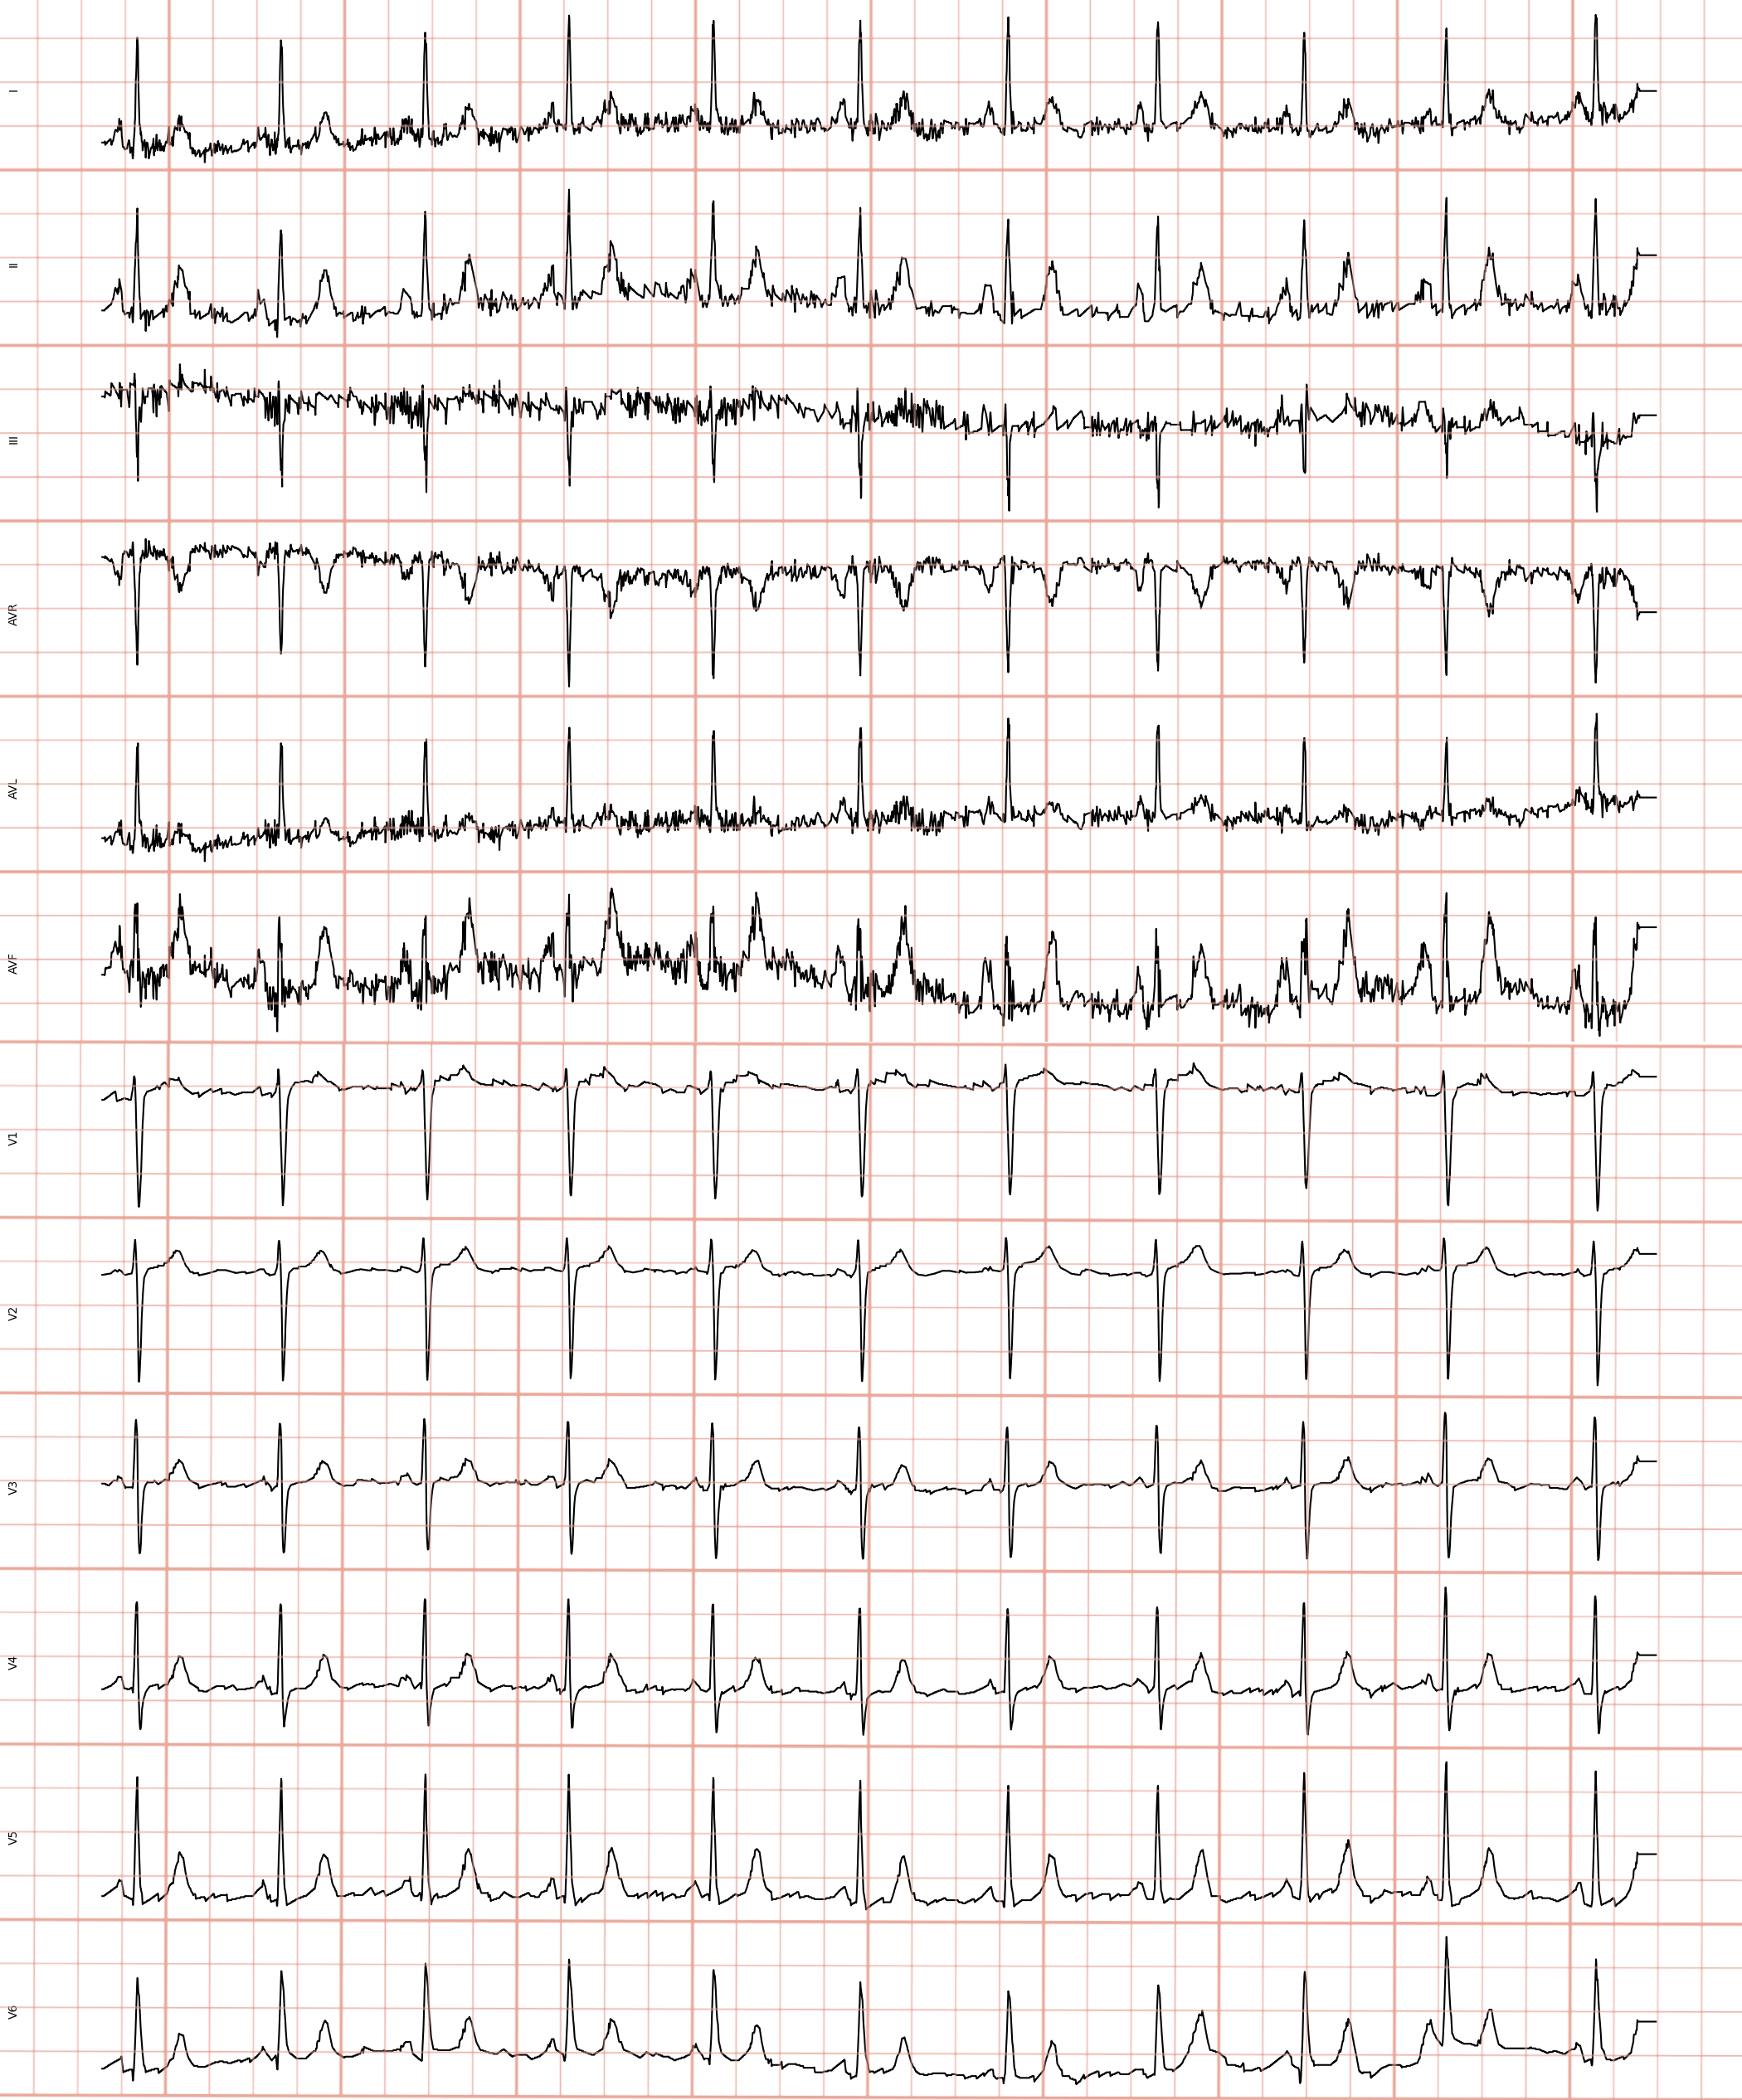

In [3]:
import matplotlib.pyplot as plt

# Load your image
img = plt.imread('ecg_bg_12.png')

num_leads = len(lead_names)
num_rows = 12
num_cols = 1


fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5))

for i, ax in enumerate(axs.flat):
    if i < num_leads:  # Ensure we don't exceed the number of leads
        ax.plot(signals[:, i], color='black')
        ax.set_ylabel(lead_names[i])
        ax.grid(True)

        # Remove x and y ticks
        ax.set_xticks([])
        ax.set_yticks([])

        # Remove box around subplot
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

# Place the image at the figure level
fig.figimage(img, resize='True', alpha=0.7)

plt.tight_layout()  # Adjust layout
plt.show()

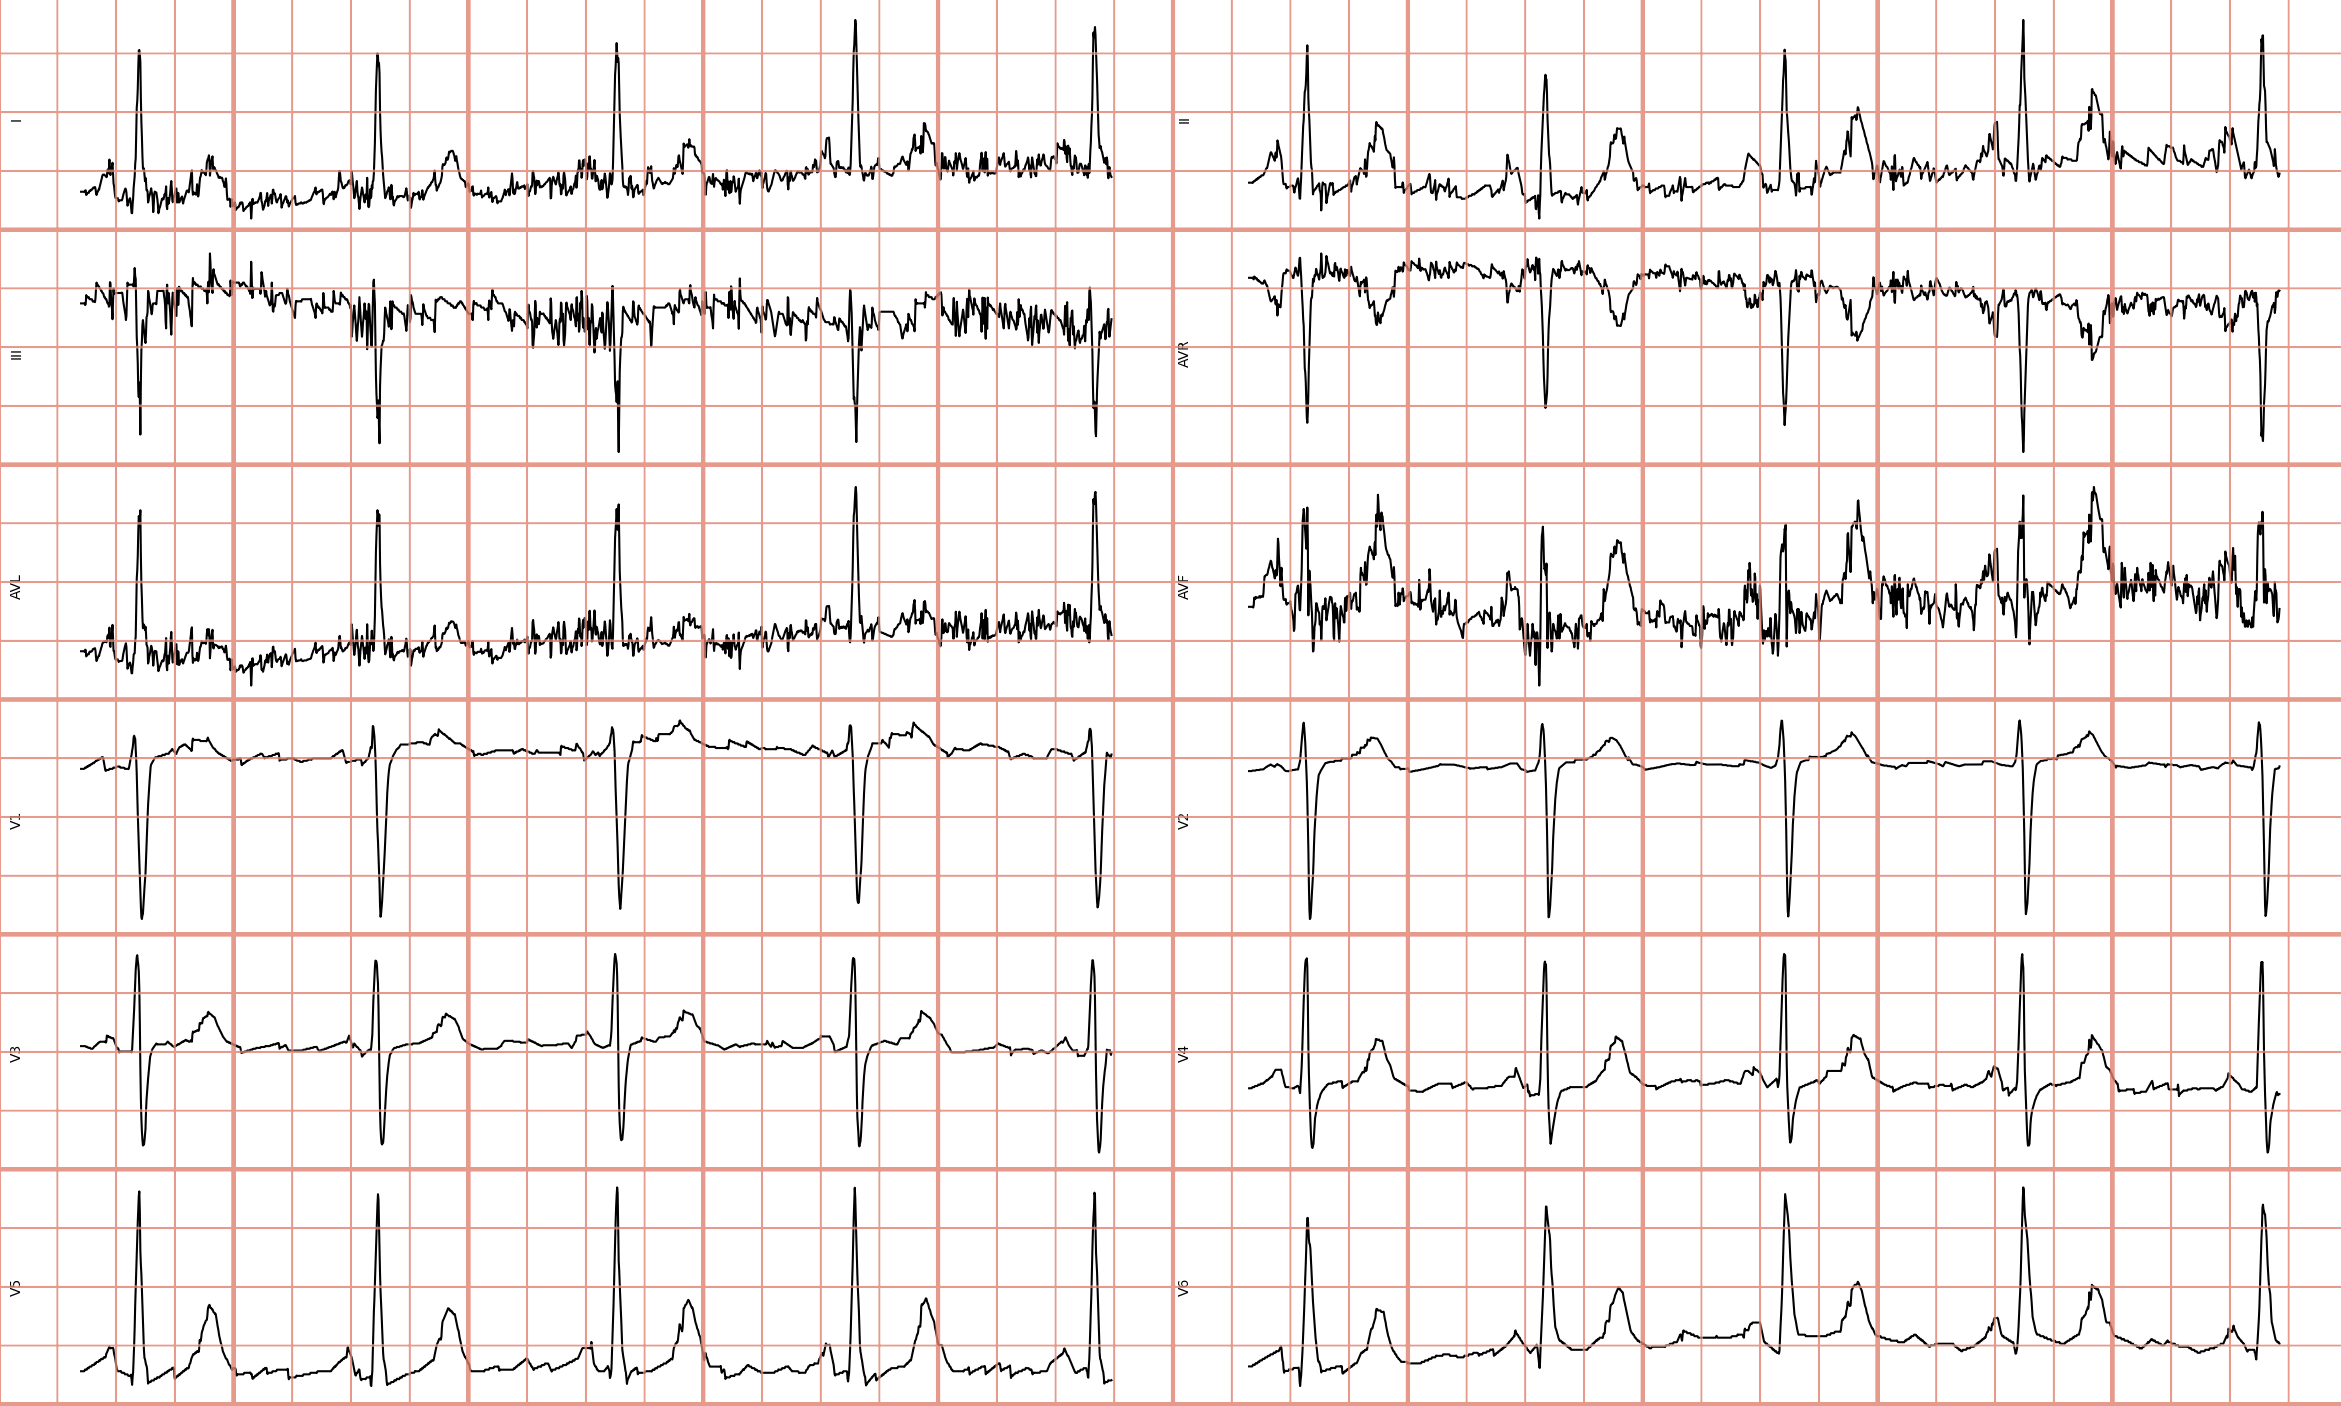

In [4]:
# Load your image
img = plt.imread('ecg_bg.png')

num_leads = len(lead_names)
num_rows = 6
num_cols = 2


fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5))

for i, ax in enumerate(axs.flat):
    if i < num_leads:  # Ensure we don't exceed the number of leads
        ax.plot(signals[:2000, i], color='black')
        ax.set_ylabel(lead_names[i])
        ax.grid(True)

        # Remove x and y ticks
        ax.set_xticks([])
        ax.set_yticks([])

        # Remove box around subplot
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

# Place the image at the figure level
fig.figimage(img, resize='True', alpha=0.8)

plt.tight_layout()  # Adjust layout
plt.show()